In [1]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv('PythonUse.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98227 entries, 0 to 98226
Columns: 148 entries, Unnamed: 0 to churn
dtypes: float64(29), int64(119)
memory usage: 110.9 MB


In [9]:
# Import Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
#import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Import metric for performance evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay

#Split data into train and test sets
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV

In [10]:
# dependent and independent variables were determined.
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 78581
X_test 19646
y_train 78581
y_test 19646


In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#Defining the modelling function
def modeling(alg, alg_name, params={}):
    model = alg(**params) #Instantiating the algorithm class and unpacking parameters if any
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
      
    #Performance evaluation
    def print_scores(alg, y_true, y_pred):
        print(alg_name)
        acc_score = accuracy_score(y_true, y_pred)
        print("accuracy: ",acc_score)
        pre_score = precision_score(y_true, y_pred)
        print("precision: ",pre_score)
        rec_score = recall_score(y_true, y_pred)                            
        print("recall: ",rec_score)
        f_score = f1_score(y_true, y_pred, average='weighted')
        print("f1_score: ",f_score)        
    print_scores(alg, y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    #Create the Confusion Matrix Display Object(cmd_obj). 
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['churn', 'notChurn'])

    #The plot() function has to be called for the sklearn visualization
    cmd_obj.plot()

    #Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It also controls the title.
    cmd_obj.ax_.set(xlabel='Predicted Churn', 
                    ylabel='Actual Churn')
    #Finally, call the matplotlib show() function to display the visualization of the Confusion Matrix.
    plt.show()
    return model

Random Forest
accuracy:  0.5834775526824799
precision:  0.585778165557858
recall:  0.5505330053300533
f1_score:  0.5830202025324727


NameError: name 'plt' is not defined

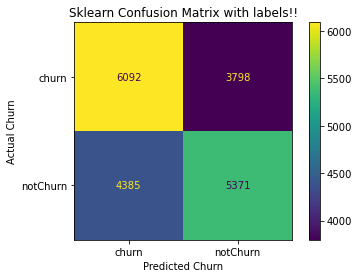

In [15]:
# Running RandomForestClassifier model
RF_model = modeling(RandomForestClassifier, 'Random Forest')